# City of Syracuse 
## Summary:
### Average Sale price in the city of Syracuse starting 2005 spiked up and for the past 10 years is around 250K to 300K.
### Syracuse folks like mid size house with 6 rooms, 2 bedrooms, 2 baths!!!
### Note: In Syracuse they have three-quarter bath!! 
### A three-quarter bathroom, sometimes simply called a three-quarter or 3/4 bath, is generally one with a toilet, sink and shower, but not a tub.
### Size of parking lot did not have a huge impact on  house sales.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
syr_data = "data/AllEvents_City_Syracuse_Property_data1.csv"


# Read the Data
syr_df = pd.read_csv(syr_data)

In [3]:
syr_df.head()

,StatusCode,StatusMsg,IdentifierObPropId,IdentifierFips,IdentifierApn,IdentifierApnOrig,IdentifierAttomId,LotDepth,LotFrontage,LotLotsize1,...,AssessmentCalculationsCalclandvalue,AssessmentCalculationsCalcttlind,AssessmentCalculationsCalcttlvalue,AssessmentCalculationsCalcvaluepersizeunit,AssessmentMarketMktimprvalue,AssessmentMarketMktlandvalue,AssessmentMarketMktttlvalue,AssessmentTaxTaxamt,AssessmentTaxTaxpersizeunit,AssessmentTaxTaxyear
0,0,SuccessWithResult,14287776649011,49011,121660011,121660011.0,142877766,0,0,0.31,...,105810,MARKET VALUE,421000,126.92,315190,105810,421000,2954.0,0.89,2018
1,0,SuccessWithResult,18373736249011,49011,121920014,121920014.0,183737362,0,0,0.31,...,105810,MARKET VALUE,352000,165.03,246190,105810,352000,2470.0,1.16,2018
2,0,SuccessWithResult,15140897749011,49011,121920012,121920012.0,151408977,0,0,0.31,...,105810,MARKET VALUE,342000,160.71,236190,105810,342000,2400.0,1.13,2018
3,0,SuccessWithResult,18373736149011,49011,121920013,121920013.0,183737361,0,0,0.31,...,105810,MARKET VALUE,318000,162.74,212190,105810,318000,2231.0,1.14,2018
4,0,SuccessWithResult,18373609949011,49011,124730074,124730074.0,183736099,0,0,0.33,...,92189,MARKET VALUE,245000,135.58,152811,92189,245000,1719.0,0.95,2018


In [5]:
# Count value for double bar graph
syr_df['Count Value'] = 1

# new columns
syr_cleaned = syr_df[['AddressOneLine','LotLotsize2','LocationLongitude',\
'LocationLatitude','UtilitiesHeatingtype',\
'BuildingSizeLivingsize', 'BuildingRoomsRoomsTotal',\
'BuildingRoomsBathstotal','BuildingRoomsBeds', 'SummaryYearbuilt',\
'SaleAmountSaleamt','AssessmentTaxTaxamt','SummaryProptype','Count Value']]

# fill blank values with 0
syr_cleaned.fillna(0, inplace=True)

# clean data results
syr_cleaned = syr_cleaned[syr_cleaned['SaleAmountSaleamt'] > 0]
syr_cleaned = syr_cleaned[syr_cleaned['AssessmentTaxTaxamt'] > 0]
syr_cleaned = syr_cleaned[syr_cleaned['SummaryYearbuilt'] > 0]
syr_cleaned = syr_cleaned[syr_cleaned['BuildingRoomsBathstotal'] > 0]
syr_cleaned = syr_cleaned[syr_cleaned['BuildingRoomsBeds'] > 0]

syr_cleaned_renamed_df  = syr_cleaned.rename(columns = {"SummaryYearbuilt": "Year Built", "SaleAmountSaleamt" : "Sale Amount"})

# reset index
syr_cleaned_renamed_df.reset_index(drop=True)

# display
syr_cleaned_renamed_df

,AddressOneLine,LotLotsize2,LocationLongitude,LocationLatitude,UtilitiesHeatingtype,BuildingSizeLivingsize,BuildingRoomsRoomsTotal,BuildingRoomsBathstotal,BuildingRoomsBeds,Year Built,Sale Amount,AssessmentTaxTaxamt,SummaryProptype,Count Value
1,"835 W 2300 S, SYRACUSE, UT 84075",13504,-112.043423,41.080420,0,2133,11,3.5,5,1995,350928,2470.00,SFR,1
3,"853 W 2300 S, SYRACUSE, UT 84075",13504,-112.043074,41.080423,0,1954,10,3.5,4,1996,312372,2231.00,SFR,1
4,"2282 S 2830 W, SYRACUSE, UT 84075",14375,-112.080872,41.080429,0,1807,6,2.0,3,2002,233066,1719.00,SFR,1
6,"2313 S 2775 W, SYRACUSE, UT 84075",8712,-112.079538,41.080460,0,1518,7,2.5,4,2004,178937,1726.00,SFR,1
8,"2292 ALLISON WAY, SYRACUSE, UT 84075",10585,-112.056987,41.080472,0,1347,10,3.0,5,1997,203095,1951.00,SFR,1
10,"2252 DORAL DR, SYRACUSE, UT 84075",12197,-112.094346,41.080491,0,2548,6,2.5,3,2006,235920,1943.00,SFR,1
15,"3367 W 2280 S, SYRACUSE, UT 84075",12197,-112.090649,41.080543,0,1326,5,2.0,3,2006,407250,2049.00,SFR,1
17,"3333 W 2280 S, SYRACUSE, UT 84075",12197,-112.089987,41.080543,0,1523,6,2.0,3,2005,200090,1698.00,SFR,1
18,"2289 S 2000 W, SYRACUSE, UT 84075",10019,-112.064428,41.080554,0,1000,7,2.0,4,1972,136900,1305.00,SFR,1
19,"2311 S 1800 W, SYRACUSE, UT 84075",16335,-112.060533,41.080554,FORCED AIR,1372,5,1.5,3,1972,154530,1466.00,SFR,1


In [6]:
x_axis = np.sort(syr_cleaned_renamed_df['Year Built'].unique())
x_axis

array([1900, 1905, 1916, 1926, 1945, 1946, 1948, 1949, 1951, 1952, 1961,
       1962, 1963, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1985, 1986,
       1987, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

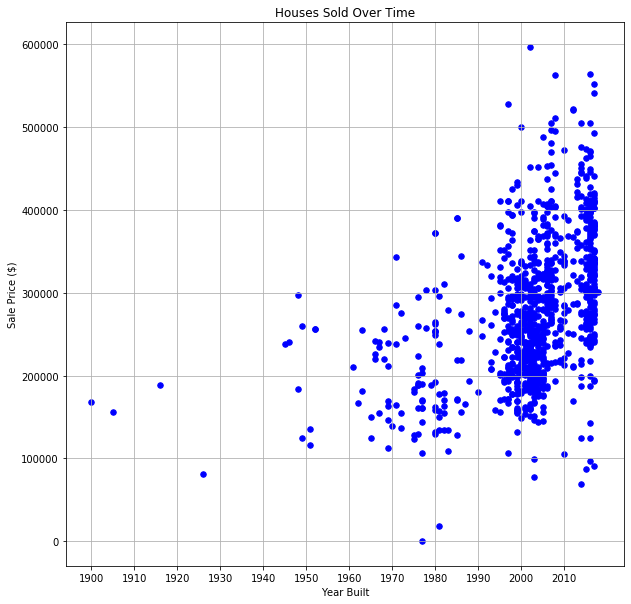

In [7]:
data = syr_cleaned_renamed_df[['Year Built','Sale Amount']]

plt.figure(figsize=(10,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

plt.show()

In [8]:
#drop the outlier
data = data[(data['Sale Amount'] < 5000000) & (data['Year Built'] > 1940)]
data.head()

,Year Built,Sale Amount
1,1995,350928
3,1996,312372
4,2002,233066
6,2004,178937
8,1997,203095


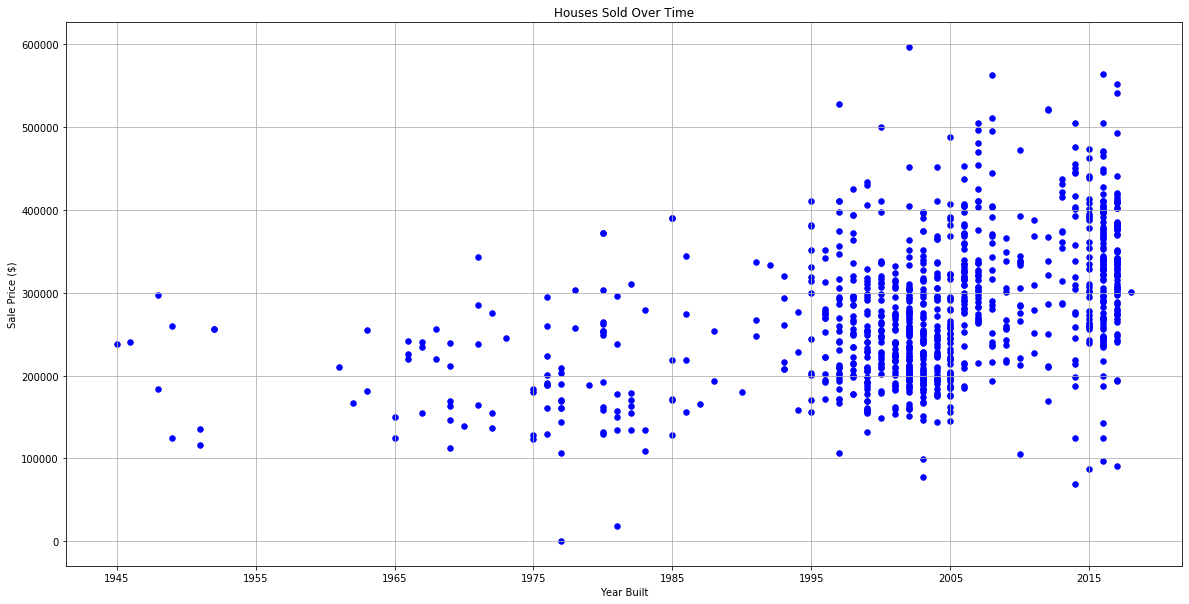

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()


In [10]:
# get the mean value and plot the scatter by year
mean_syracuse_data = data.groupby(["Year Built"]).mean()

# Convert to DataFrame
mean_syracuse_df = mean_syracuse_data.reset_index()

# Preview DataFrame
mean_syracuse_df.head()

,Year Built,Sale Amount
0,1945,237500.0
1,1946,240130.0
2,1948,240586.5
3,1949,192231.0
4,1951,125905.0


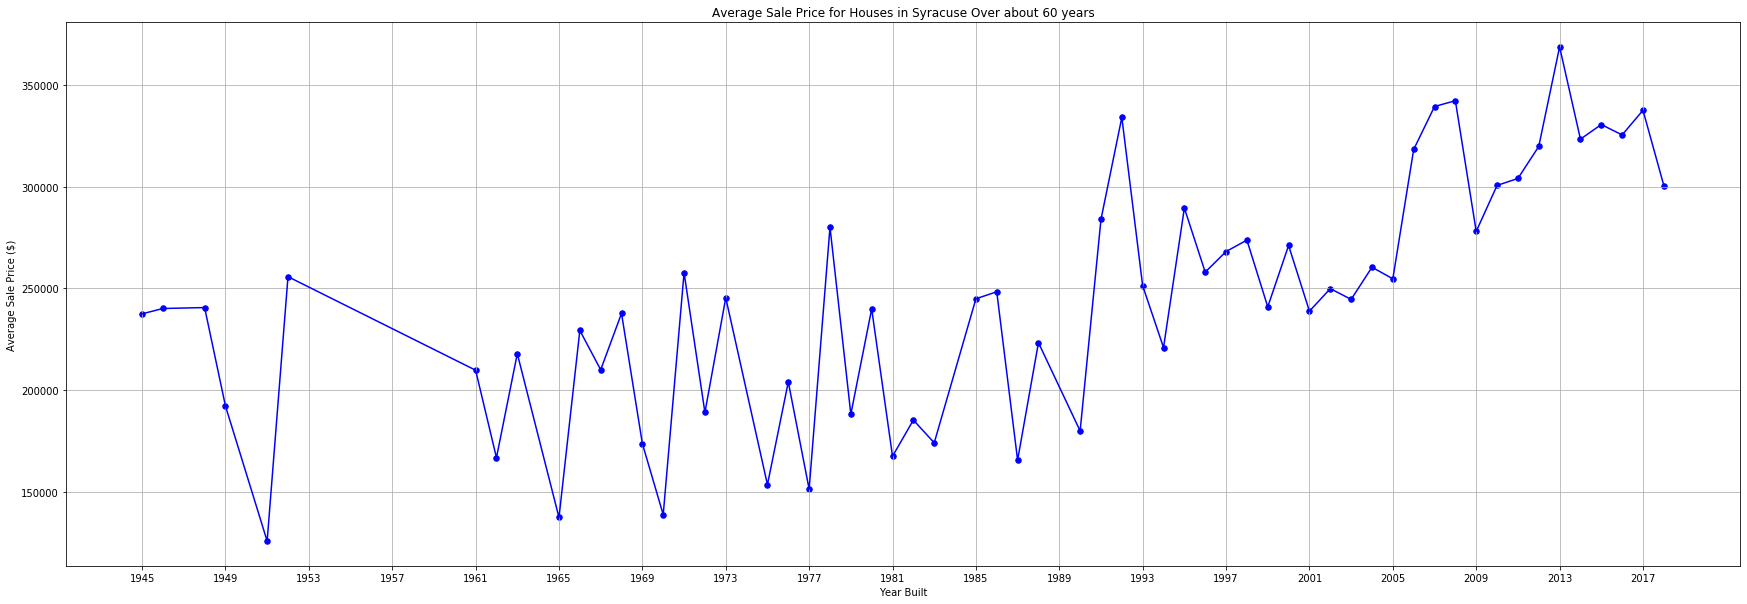

In [11]:
data = mean_syracuse_df

plt.figure(figsize=(30,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)
plt.errorbar(data['Year Built'], data['Sale Amount'], color="b")

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 4))

# Create a title, x label, and y label for our chart
plt.title("Average Sale Price for Houses in Syracuse Over about 60 years")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
plt.savefig("Images/Syracuse_AverageSalePrice")

plt.show()

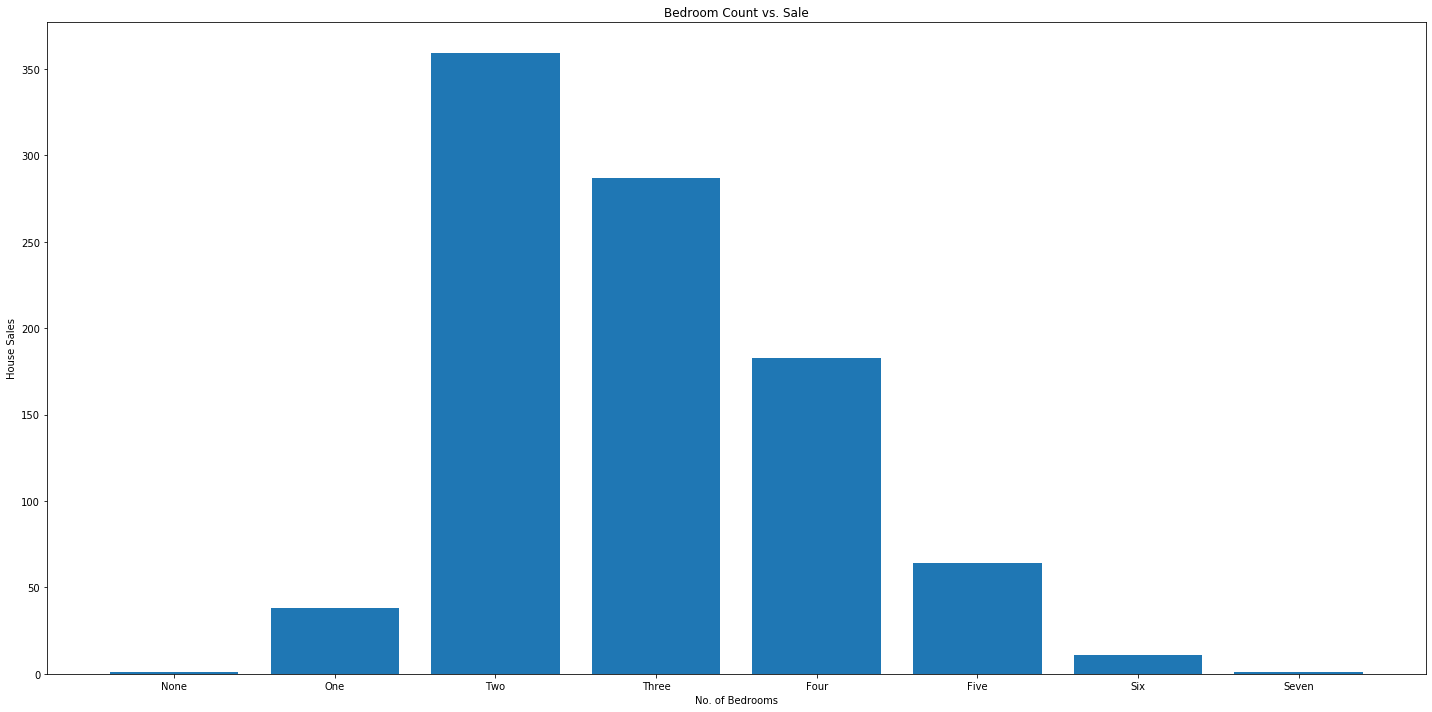

In [12]:
plt.figure(figsize=(20,10))

syr_cleaned_renamed_df['Count Value'] = 1

x_axis = syr_cleaned_renamed_df['BuildingRoomsBeds'].unique()

bars_in_bedrooms = ["None","One", "Two", "Three", "Four", "Five","Six","Seven"]

data = syr_cleaned_renamed_df.groupby(['BuildingRoomsBeds'])['Count Value'].count().reset_index()
plt.bar(bars_in_bedrooms, data['Count Value'], align="center")

plt.title("Bedroom Count vs. Sale")
plt.xlabel("No. of Bedrooms")
plt.ylabel("House Sales")
     
plt.tight_layout()

plt.savefig("Images/Syracuse_BedRoomCountVsSale")

plt.show()

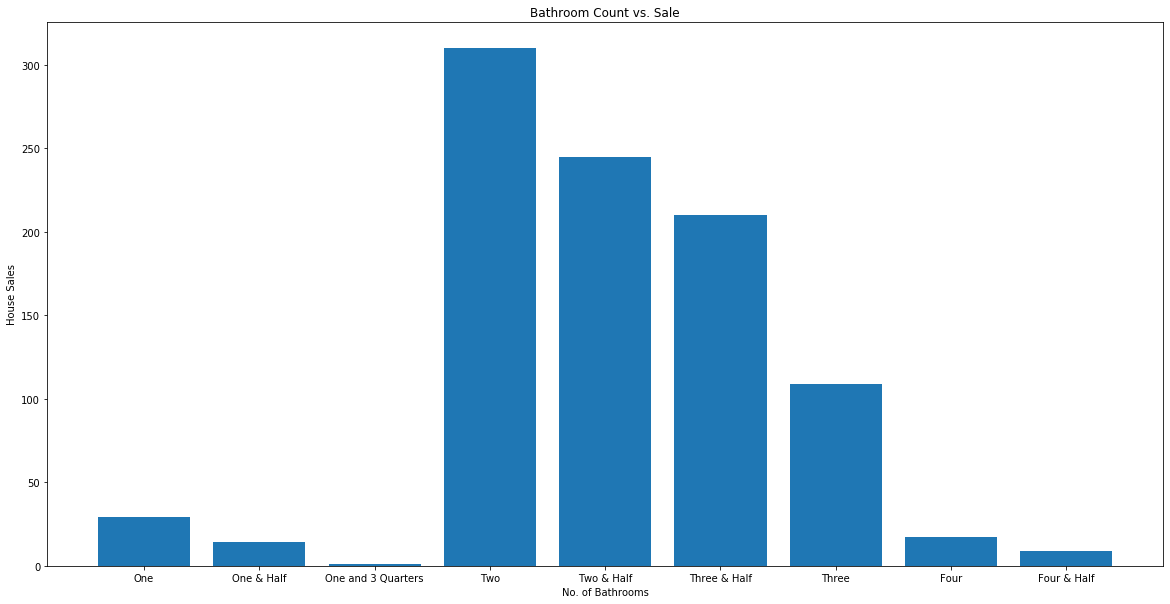

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))

syr_cleaned_renamed_df['Count Value'] = 1

x_axis = syr_cleaned_renamed_df['BuildingRoomsBathstotal'].unique()
x_axis = [float(x) for x in x_axis.tolist()]
np.sort(x_axis)

bars_in_bathrooms = ["One", "One & Half", "One and 3 Quarters", "Two","Two & Half", "Three & Half","Three", "Four", "Four & Half"]

data = syr_cleaned_renamed_df.groupby(['BuildingRoomsBathstotal'])['Count Value'].count().reset_index()

plt.bar(bars_in_bathrooms, data['Count Value'], align="center")

plt.title("Bathroom Count vs. Sale")
plt.xlabel("No. of Bathrooms")
plt.ylabel("House Sales")

plt.savefig("Images/Syracuse_BathroomCountVsSale")

plt.show()
     
plt.tight_layout()


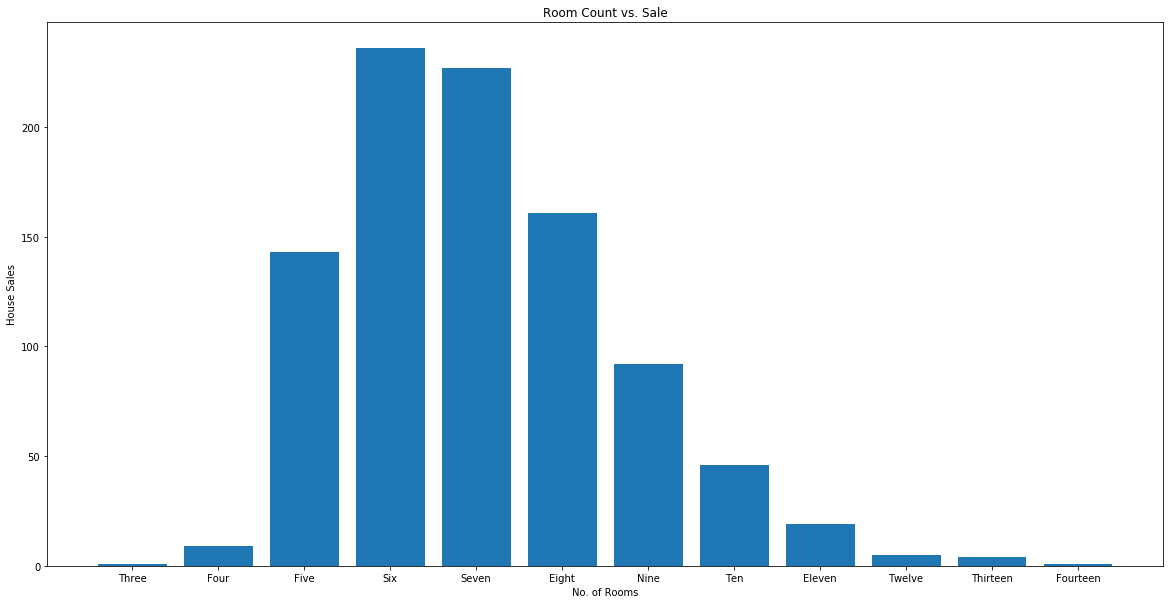

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,10))

syr_cleaned_renamed_df['Count Value'] = 1

x_axis = syr_cleaned_renamed_df['BuildingRoomsRoomsTotal'].unique()
np.sort(x_axis)

bars_in_rooms = ["Three", "Four", "Five", "Six", "Seven", "Eight","Nine", "Ten",\
                      "Eleven","Twelve","Thirteen","Fourteen"]

data = syr_cleaned_renamed_df.groupby(['BuildingRoomsRoomsTotal'])['Count Value'].count().reset_index()

# data
plt.bar(bars_in_rooms, data['Count Value'], align="center")

plt.title("Room Count vs. Sale")
plt.xlabel("No. of Rooms")
plt.ylabel("House Sales")

plt.savefig("Images/Syracuse_RoomCountVsSale")

plt.show()
     
plt.tight_layout()

In [16]:
syr_groupby = syr_cleaned.groupby(['BuildingRoomsBeds', 'BuildingRoomsBathstotal'])


syr_groupby['Count Value'].count()

BuildingRoomsBeds  BuildingRoomsBathstotal
1                  1.00                         1
2                  1.00                         6
                   1.50                         3
                   1.75                         1
                   2.00                        27
                   3.00                         1
3                  1.00                        17
                   1.50                         6
                   2.00                       181
                   2.50                       129
                   3.00                        20
                   3.50                         5
                   4.50                         1
4                  1.00                         4
                   1.50                         4
                   2.00                        65
                   2.50                        96
                   3.00                        88
                   3.50                        28
       

In [17]:
# to find n
len(syr_groupby['Count Value'].sum())

39

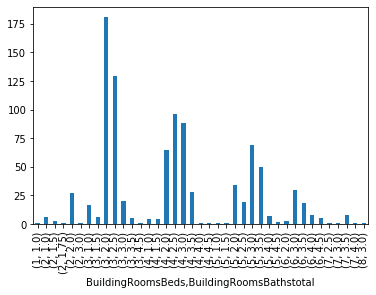

In [18]:
syr_groupby['Count Value'].count().plot(kind='bar')

In [28]:
# x_axis = np.sort(syr_cleaned['SummaryYearbuilt'].unique())
# x_axis

In [29]:
# len(x_axis)

In [30]:
# built_v_sales = syr_cleaned[['SummaryYearbuilt','SaleAmountSaleamt']]
# built_v_sales.reset_index(drop=True)
# built_v_sales

In [31]:
# plt.figure(figsize=(10,10))
# plt.scatter(built_v_sales['SummaryYearbuilt'], built_v_sales['SaleAmountSaleamt'],marker="o",c="b", s = 30)

# plt.xticks(np.arange(min(built_v_sales['SummaryYearbuilt']),max(built_v_sales['SummaryYearbuilt']) + 1, 10))

# # Create a title, x label, and y label for our chart
# plt.title("Houses Sold Over Time")
# plt.xlabel("Year")
# plt.ylabel("Sale Price ($)")

# # set grid lines
# plt.grid()

# plt.show()

In [ ]:
# clean_year = built_v_sales.groupby(['SummaryYearbuilt'])
# clean_year.mean()